In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)
library(fmsb)
library(boot)
library(stringr)

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘fmsb’ was built under R version 4.0.5”
Warning message:
“package ‘boot’ was built under R version 4.0.3”

Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml


Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'plots/'
file_dir = 'outputs/'

file_suf_trmissing = '25'

#use_gw_cov_ooc = TRUE
use_gw_cov_ooc = FALSE
gw_suf_ooc = ''
if (use_gw_cov_ooc) {
    gw_suf_ooc = '_OOC'
}

#BOOTSTRAP = FALSE
BOOTSTRAP = TRUE
BS_N = ''
ncpus = ''
if (BOOTSTRAP) {
    BS_N = 10000
    ncpus = 8 
}

In [3]:
prs_mode = 'prscs'
file_suf = 'SQ20_SAMPLES_AD2_SAMPLES'

file_main = paste0(file_dir, 'combined_svs_trs_snvs_prs_pc_prscs_', file_suf, '_DELINS_GW_plat', '_TRmissingness', file_suf_trmissing, '_fltHomPol_famGT.csv')

df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
dim(df_main)
df_main

[1]  243 5574

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q_del,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q_ins,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof,count_cnvs_sh,count_cnvs_cl,count_cnvs_all
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,0,0,0,-0.971701072,-0.510485305,0.82162924,0,0,0,0
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,0,0,0.303644763,0.817056455,0.06312390,1,0,0,0
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,0,0,0,0.595643472,-0.305436874,1.94303491,2,0,0,0
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,1.166191828,0.943709479,-2.78896425,1,0,0,0
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,0,0,0,0.703902177,-0.152554399,0.06482359,0,0,0,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,0,0.384605619,0.209070495,0.16440487,0,0,0,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,0,0,0,-0.898010204,-0.994547648,0.53088874,1,0,0,0
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,0,0,-1.036073363,-1.487948561,0.29231934,1,0,0,0
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,0,0,0,0.817923575,-0.003587407,-0.08546761,1,0,0,0


In [4]:
### ont/pb specific data frames
df_main_ont = df_main %>% filter(Platform == 'ONT')
df_main_pb = df_main %>% filter(Platform == 'PB')
print(dim(df_main_ont))
print(dim(df_main_pb))

[1]  101 5574
[1]  142 5574


In [5]:
getNagelkerkeR2_bootstrap <- function(null_formula, model_formula, data, indices) {
    d <- data[indices,]
    null_model <- try(clogit(null_formula, data = d, method="approximate"), silent = TRUE)
    clogit_model <- try(clogit(model_formula, data = d, method="approximate"), silent = TRUE)

    # Check if the model fitting was successful
    if (inherits(null_model, "try-error") || inherits(clogit_model, "try-error")) {
        return(NA)  # Return NA if the model couldn't be fitted
    } else {
        loglik0 = logLik(null_model)
        loglikM = logLik(clogit_model)
        cs_r2 = 1.0 - exp(2/nrow(d) * (loglik0 - loglikM))
        ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(d) * (loglik0)))
        return(as.double(ngk_r2))
    }
}

In [6]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

In [7]:
zs_thr = 3
supp_thr = 2
q_suf = '_Q'

BS_N_suff = ''
if (BOOTSTRAP) {
    BS_N_suff = paste0('_N', BS_N)
}
fig_suf = paste0('_supp', supp_thr, BS_N_suff)

#PRINT_INFO = TRUE
PRINT_INFO = FALSE
SHOW_FORMULA = TRUE
#SHOW_FORMULA = FALSE

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()

print('with CNV burden...')
sv_fts = c('PLIp9_cds + PLIp9_utr + cnvs_all')
sv_labels = c('SVs (pLI≥0.9)')

gw_sv_var = 'count_genomewide'
gw_sv_var_ooc = 'gw_sv_ooc'
if (use_gw_cov_ooc) {
    df_main[gw_sv_var_ooc] = df_main[gw_sv_var] - df_main['count_PLIp9_cds'] - df_main['count_PLIp9_utr']
} else {
    df_main[gw_sv_var_ooc] = df_main[gw_sv_var]
}

tr_fts = c('DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
tr_labels = c('TRs (fetal brain)')

gw_tr_var = paste0('count_ZS', zs_thr, '_genomewide_SUPP', supp_thr, q_suf)
gw_tr_var_ooc = 'gw_tr_ooc'

if (use_gw_cov_ooc) {
    df_main[gw_tr_var_ooc] = df_main[gw_tr_var] - df_main[paste0('count_ZS', zs_thr, '_PLIp9_cds', '_SUPP', supp_thr, q_suf)] - df_main[paste0('count_ZS', zs_thr, '_PLIp9_utr', '_SUPP', supp_thr, q_suf)]
} else {
    df_main[gw_tr_var_ooc] = df_main[gw_tr_var]
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
##print('var_svs:')
##print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
##print('var_trs:')
##print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'

### cnv burden is added to the SV burden so no need to add an extra one here...
vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu), collapse=' + ')
print('vars_all:')
print(vars_all)
vars_all_vec = unlist(strsplit(vars_all, split='+', fixed=TRUE)) # split vars with +
vars_all_vec = str_trim(vars_all_vec) # trim spaces

var_svs_trs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + ')
##print('var_svs_trs:')
##print(var_svs_trs)

var_svs_trs_snv = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)], var_snv), collapse=' + ')
print('var_svs_trs_snv:')
print(var_svs_trs_snv)

var_svs_trs_snv_prs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)], var_snv, var_prs), collapse=' + ')
print('var_svs_trs_snv_prs:')
print(var_svs_trs_snv_prs)

vars = c(var_svs, var_trs, var_svs_trs, var_snv, var_svs_trs_snv, var_prs, var_svs_trs_snv_prs)
var_labels = c(sv_labels, tr_labels, 'SVs + TRs','SNVs', 'Rare variants combined', 'PGS (ASD,SCZ,EDU)', 'Rare variants + PGS')
##print('vars:')
##print(vars)

for (i_var in 1:length(vars)) {

    var = vars[i_var]
    print(paste('working on var:', var))

    var_vec = unlist(strsplit(var, split='+', fixed=TRUE)) # split vars with +
    var_vec = str_trim(var_vec) # trim spaces
    ##print('var_vec:')
    ##print(var_vec)
    
    vars_null = c()
    for (var_test in vars_all_vec) {
        if (!(var_test %in% var_vec)) {
            vars_null = c(vars_null, var_test)
        }
    }
    vars_null = paste(vars_null, collapse=' + ')
    ##print('vars_null:')
    ##print(vars_null)
    
    ### clogit null
    null_formula = as.formula(paste('Phenotype ~', vars_null, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc, 
                                    '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('null_formula:')
        print(null_formula)
    }
    #null_model <- clogit(null_formula, data = df_main)
    null_model <- clogit(null_formula, data = df_main, method="approximate")
    loglik0 = logLik(null_model)

    if (SHOW_FORMULA) {
        print('null_model:')
        print(summary(null_model))
    }

    model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('model_formula:')
        print(model_formula)
    }
    
    clogit_model <- clogit(model_formula, data = df_main, method="approximate")
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))

    if (SHOW_FORMULA) {
        print('clogit_model:')
        print(summary(clogit_model))
    }
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        set.seed(0)
        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=BS_N, 
                             null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t, na.rm = TRUE)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])

        print('ngk_ste:')
        print(ngk_ste)
        print('ngk_ci:')
        print(ngk_ci)
        print('ngk_ci_lower:')
        print(ngk_ci_lower)
        print('ngk_ci_upper:')
        print(ngk_ci_upper)
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    ano_pvals = c(ano_pvals, ano_pval)

    SHOW_FORMULA = FALSE
}

my_data = data.frame('variables' = vars, 'var_labels' = var_labels, 'ngk_r2s' = ngk_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     'ano_pval' = ano_pvals, 'Platform' = 'All')

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

[1] "with CNV burden..."
[1] "vars_all:"
[1] "count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + count_cnvs_all + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z"
[1] "var_svs_trs_snv:"
[1] "count_PLIp9_cds + count_PLIp9_utr + count_cnvs_all + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof"
[1] "var_svs_trs_snv_prs:"
[1] "count_PLIp9_cds + count_PLIp9_utr + count_cnvs_all + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z"
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_all"
[1] "null_formula:"
Phenotype ~ count_dnlof_inhlof + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + 
    count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + PRS_ASD_Z + PRS_SCZ_Z + 
    PRS_EDU_Z + gw_sv_ooc + gw_tr_ooc + sex + MEAN_COVERAGE + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    st

[1] "plots/R2_CNVburden_prscs_vars_Nagelkerke_bootstrap_supp2_N10000.png"


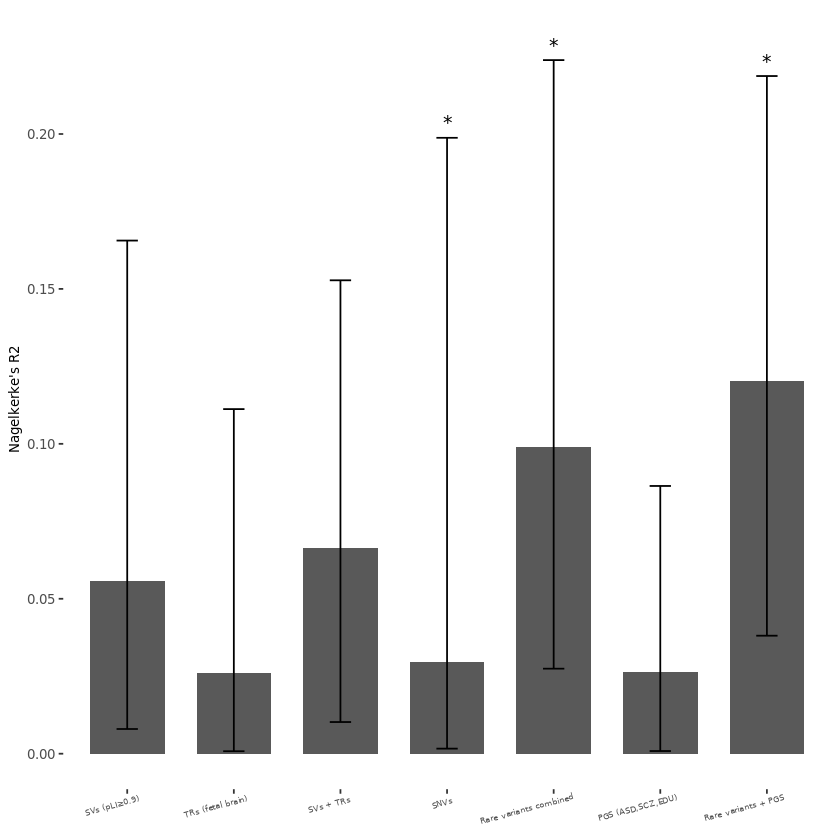

In [8]:
size_txt = 8
size_sig = 4

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

base_ngk <- ggplot(my_data, aes(x = var_labels, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = w1) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = w2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 15, vjust = 1, hjust=.8, size=size_txt-3),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
               ) +
          scale_x_discrete(limits=var_labels, labels=var_labels) 

print(base_ngk)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_CNVburden_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_CNVburden_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}

print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 3, height = 1.75, dpi = 1200, units = "in")